<a href="https://colab.research.google.com/github/bernick27/Identificacion_candidatos_2021/blob/main/CuadernoTrabajo_Con_Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Requisitos

In [1]:
!pip install pytube
!pip install librosa
!pip install soundfile
!apt install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 17 not upgraded.


## Librerías

In [2]:
from pytube import YouTube
import librosa
import soundfile as sf
import os
import subprocess
import math
from wave import open as open_wave
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, skew

plt.style.use('seaborn-whitegrid')
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.precision", 8)
pd.set_option('display.width', 1000)

## Principales Datos

In [3]:
# Lista de Urls
url_audios = [
               "https://www.youtube.com/watch?v=U7JizpfSc1U",
               "https://www.youtube.com/watch?v=xcq0GAxwd4c"
]

In [4]:
etiquetas = [
             "persona_01",
             "persona_02",
             "persona_03",
             "persona_04",
             "persona_05",
             "persona_06",
             "persona_07",
             "otros"
]

In [5]:
dv = "/"
ruta_descarga = "descarga" + dv
ruta_particionado = "descarga" + dv + "particionado" + dv

In [6]:
if not os.path.isdir(ruta_descarga):
    os.mkdir(ruta_descarga)

if not os.path.isdir(ruta_particionado):
    os.mkdir(ruta_particionado)

In [7]:
lista_audios = []
for index, nombre_audio in enumerate(url_audios):
    youtube = YouTube(nombre_audio)
    stream = youtube.streams.filter(only_audio=True)
    archivo_salida = stream[1].download(ruta_descarga)
    nuevo_nombre_audio = "audio" + str(index + 1).rjust(5, "0")[-3:] + ".webm"
    print(nuevo_nombre_audio)
    os.rename(archivo_salida, ruta_descarga + nuevo_nombre_audio)
    lista_audios.append(nuevo_nombre_audio)

audio001.webm
audio002.webm


In [8]:
list(stream)

[<Stream: itag="140" mime_type="audio/mp4" abr="128kbps" acodec="mp4a.40.2" progressive="False" type="audio">,
 <Stream: itag="249" mime_type="audio/webm" abr="50kbps" acodec="opus" progressive="False" type="audio">,
 <Stream: itag="250" mime_type="audio/webm" abr="70kbps" acodec="opus" progressive="False" type="audio">,
 <Stream: itag="251" mime_type="audio/webm" abr="160kbps" acodec="opus" progressive="False" type="audio">]

In [9]:
def convertir_wav(in_file, out_file):
    command = ['ffmpeg', '-i', in_file, "-ac", "1", out_file]
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)

In [10]:
list_audios_wav = []
for nombre_audio in lista_audios:
    nuevo_nombre_audio, ext = os.path.splitext(nombre_audio)
    nuevo_nombre_audio = nuevo_nombre_audio + ".wav"
    if os.path.isfile(ruta_descarga + nuevo_nombre_audio):
        os.remove(ruta_descarga + nuevo_nombre_audio)
    convertir_wav(ruta_descarga + nombre_audio, ruta_descarga + nuevo_nombre_audio)
    print(nuevo_nombre_audio)
    os.remove(ruta_descarga + nombre_audio)
    list_audios_wav.append(nuevo_nombre_audio)

audio001.wav
audio002.wav


In [11]:
for nombre_audio in list_audios_wav:
    data, fs = librosa.load(ruta_descarga + nombre_audio, sr=None, mono=True)
    nuevo_nombre_audio, ext = os.path.splitext(nombre_audio)
    ruta_nueva_particion = ruta_particionado + nuevo_nombre_audio +  dv
    if not os.path.isdir(ruta_nueva_particion):
        os.mkdir(ruta_nueva_particion)

    for segmento in range(1, math.ceil(len(data)/fs)):
        nombre_particion = ruta_nueva_particion + nuevo_nombre_audio + "_" + str(segmento).rjust(6, "0")[-4:] + ".wav"
        sf.write(nombre_particion, data[fs*(segmento - 1): fs*segmento], fs)

## Etiquetado: realizado por una persona

In [12]:
def renombrar_particion(ini, fin, persona, nombre_audio):
    solo_nombre_audio, ext = os.path.splitext(nombre_audio)
    ruta_particion = ruta_particionado + solo_nombre_audio + dv
    for i in range(ini, fin + 1):
        numero = str(i).rjust(6, "0")[-4:]
        nombre_particion = ruta_particion + solo_nombre_audio + "_" + numero + ext
        nuevo_nombre_particion = ruta_particion + solo_nombre_audio + "_" + numero + "_" + persona + ext
        if os.path.isfile(nombre_particion):
            os.rename(nombre_particion, nuevo_nombre_particion)

#### Primer audio

In [13]:
nombre_audio = "audio001.wav"

wf = open_wave(ruta_descarga + nombre_audio, 'rb')
total_particion = int(wf.getnframes()/wf.getframerate())
print("total segundo particion: ", total_particion, "seg")
print("total minuos particion: ", round(total_particion / 60,3), "min")

total segundo particion:  3170 seg
total minuos particion:  52.833 min


In [14]:
# Del segundo 0 al segundo 500 es persona_01
renombrar_particion(1, 500, "persona_01", nombre_audio)

# Del segundo 501 al segundo 1000 es persona_02
renombrar_particion(501, 1000, "persona_02", nombre_audio)

# Del segundo 1001 al segundo 1500 es persona_03
renombrar_particion(1001, 1500, "persona_03", nombre_audio)

# Del segundo 1501 al segundo 2000 es persona_04
renombrar_particion(1501, 2000, "persona_04", nombre_audio)

# Del segundo 2001 al segundo 2500 es persona_05
renombrar_particion(2001, 2500, "persona_05", nombre_audio)

# Del segundo 2501 al segundo 3000 es persona_06
renombrar_particion(2501, 3000, "persona_06", nombre_audio)

# Del segundo 3001 al segundo 3170 es persona_07
renombrar_particion(3001, 3500, "persona_07", nombre_audio)


In [15]:
nombre_audio = "audio002.wav"

wf = open_wave(ruta_descarga + nombre_audio, 'rb')
total_particion = int(wf.getnframes()/wf.getframerate())
print("total segundo particion: ", total_particion, "seg")
print("total minuos particion: ", round(total_particion / 60,3), "min")

total segundo particion:  1420 seg
total minuos particion:  23.667 min


In [16]:
# Del segundo 0 al segundo 500 es persona_01
renombrar_particion(1, 500, "persona_07", nombre_audio)

# Del segundo 501 al segundo 1000 es persona_06
renombrar_particion(501, 1000, "persona_06", nombre_audio)

# Del segundo 1001 al segundo 1500 es persona_05
renombrar_particion(1001, 1500, "persona_05", nombre_audio)

### EJEMPLO ANÁLISIS

In [17]:
nombre_audio = "audio002.wav"
solo_nombre_audio, ext = os.path.splitext(nombre_audio)
ruta_particion = ruta_particionado + solo_nombre_audio + dv
#nombre_particion = "audio002_0595_persona_06.wav"
nombre_particion = "audio002_0001_persona_07.wav"
data, fs = librosa.load(ruta_particion + nombre_particion, sr=None, mono=True)

In [18]:
data.shape, fs

((48000,), 48000)

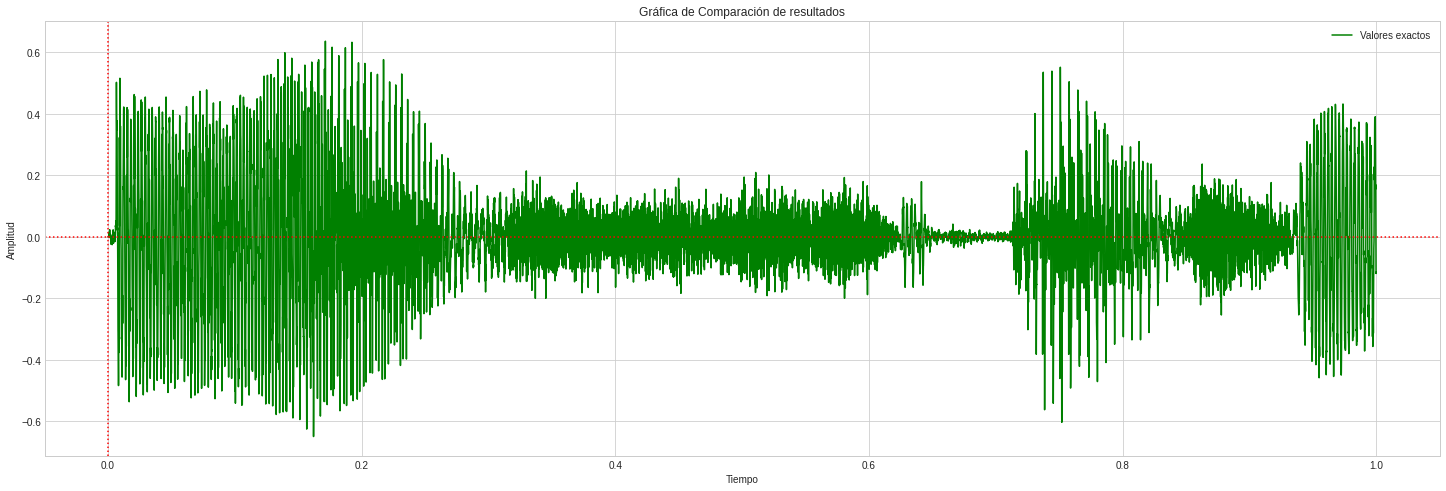

In [19]:
plt.figure(figsize=(25, 8))
#plt.plot(np.array([i for i in range(0, fs)]), data)
plt.plot(np.linspace(0, 1, fs), data, label="Valores exactos", color="g")
# Leyenda, etiqueta y título
plt.legend()
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.axhline(y=0, color="r", linestyle=":")
plt.axvline(x=0, color="r", linestyle=":")
plt.title("Gráfica de Comparación de resultados")

# Mostrando el gráfico
plt.show()

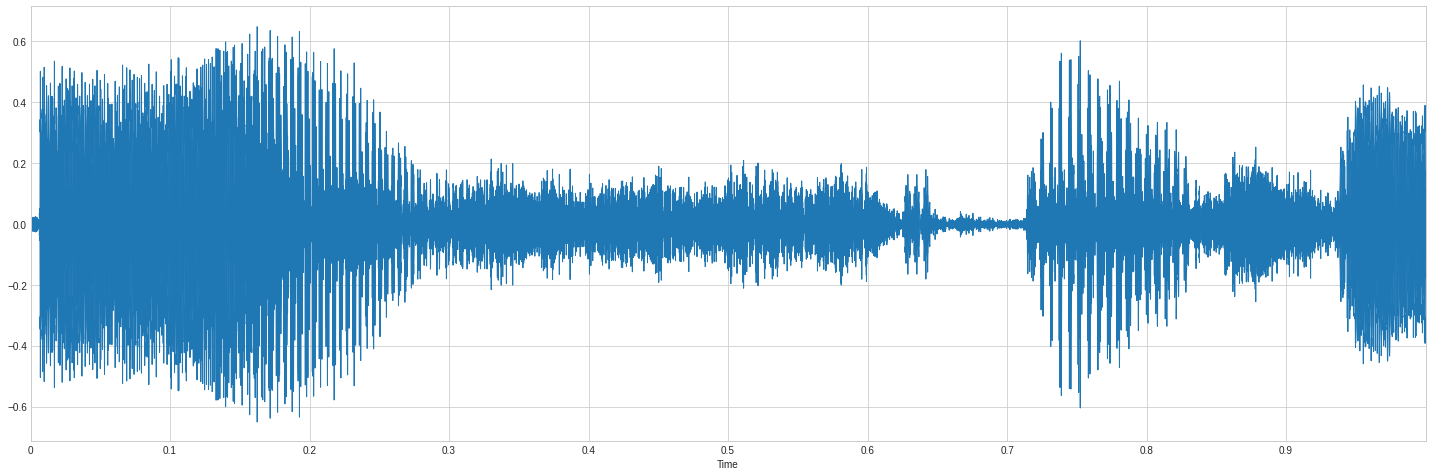

In [20]:
import librosa.display

plt.figure(figsize=(25, 8))
librosa.display.waveplot(data, sr=fs)

In [21]:
import IPython.display as ipd
ipd.Audio(ruta_particion + nombre_particion) # load a local WAV file

In [22]:
import numpy.fft as fft
spectrum = fft.fft(data)

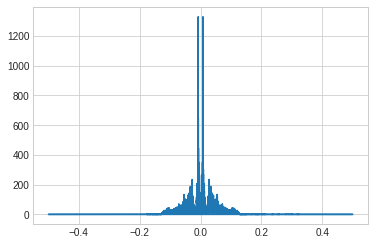

In [23]:
freq = fft.fftfreq(len(spectrum))
plt.plot(freq, abs(spectrum))

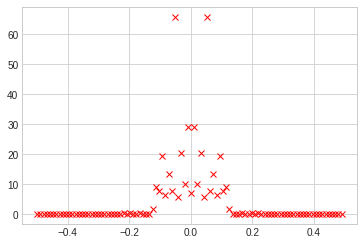

In [47]:
fourier_features = []
freq_features = []
for i in range(int(len(spectrum)/500)):
  fourier_features.append(abs(spectrum)[i*500])
  freq_features.append(freq[i*500])

plt.plot(freq_features, fourier_features, 'xr')

In [24]:
threshold = 0.5 * max(abs(spectrum))
mask = abs(spectrum) > threshold
peaks = freq[mask]

In [25]:
peaks

array([ 0.00770833,  0.00772917,  0.00775   ,  0.00777083,  0.00779167,
        0.0078125 ,  0.00783333,  0.00785417,  0.007875  , -0.007875  ,
       -0.00785417, -0.00783333, -0.0078125 , -0.00779167, -0.00777083,
       -0.00775   , -0.00772917, -0.00770833])

In [26]:
max(spectrum)

(1241.4382008746295+172.69875860674063j)

In [27]:
def listar_archivos_wav(ruta_base):
    archivos = []
    # (_)r=root, d=directories, f = files
    for _, d, f in os.walk(ruta_base):
        for archivo in f:
            if ".wav" in archivo:
                archivos.append(archivo)
    return archivos

In [28]:
dataset_array = []
for nombre_audio in list_audios_wav:
    solo_nombre_audio, ext = os.path.splitext(nombre_audio)
    ruta_particion = ruta_particionado + solo_nombre_audio + dv
    #print(ruta_particion)
    lista_archivos = listar_archivos_wav(ruta_particion)
    #print(lista_archivos[1])
    for archivo_wav in lista_archivos:
        audio, fs = librosa.load(ruta_particion + archivo_wav, sr=None, mono=True)
        clase = "_".join(archivo_wav.replace(".wav", "").split("_")[2:])
        fila = []
        fila.append(archivo_wav) # id
        fila.append(np.mean(audio)) # media
        fila.append(np.abs(np.mean(audio))) # media_abs
        fila.append(np.median(audio)) # mediana
        fila.append(np.abs(np.median(audio))) # mediana_abs
        fila.append(np.std(audio)) # std
        fila.append(np.var(audio)) # var
        fila.append(kurtosis(audio)) # kurtosis
        fila.append(skew(audio)) # skew
        fila.append((np.diff(np.sign(audio)) != 0).sum()) # cruce_cero *
        fila.append(np.percentile(audio, 10)) # per_00
        fila.append(np.percentile(audio, 10)) # per_10
        fila.append(np.percentile(audio, 20)) # per_20
        fila.append(np.percentile(audio, 30)) # per_30
        fila.append(np.percentile(audio, 40)) # per_40
        fila.append(np.percentile(audio, 50)) # per_50
        fila.append(np.percentile(audio, 60)) # per_60
        fila.append(np.percentile(audio, 70)) # per_70
        fila.append(np.percentile(audio, 80)) # per_80
        fila.append(np.percentile(audio, 90)) # per_90
        fila.append(np.percentile(audio, 100)) # per_100
        fila.append(np.sqrt(np.sum(np.square(audio))/len(audio))) # smss *
        fila.append(clase) # clase
        dataset_array.append(fila)

cols = ["id", "media", "media_abs", "mediana", "mediana_abs",
        "std", "var", "kurtosis", "skew", "cruce_cero", "per_00", 
        "per_10", "per_20", "per_30", "per_40", "per_50", "per_60",
        "per_70", "per_80", "per_90", "per_100", "smss", "clase"]
dataset = pd.DataFrame(data=dataset_array, columns=cols)

In [29]:
dataset

,id,media,media_abs,mediana,mediana_abs,std,var,kurtosis,skew,cruce_cero,per_00,per_10,per_20,per_30,per_40,per_50,per_60,per_70,per_80,per_90,per_100,smss,clase
0,audio001_2056_persona_05.wav,-0.00016553,0.00016553,-0.00158691,0.00158691,0.20486695,0.04197047,0.22415649,0.06499036,1241,-0.27304077,-0.27304077,-0.15122070,-0.07611084,-0.03436279,-0.00158691,0.03164673,0.07459412,0.14227905,0.28241882,0.61367798,0.20486700,persona_05
1,audio001_2895_persona_06.wav,0.00002962,0.00002962,0.00047302,0.00047302,0.21043901,0.04428457,0.35577859,0.00733484,1611,-0.31015320,-0.31015320,-0.13303223,-0.03852234,-0.01168823,0.00047302,0.01336670,0.04330444,0.13648682,0.29990234,0.63009644,0.21043900,persona_06
2,audio001_0903_persona_02.wav,0.00002834,0.00002834,-0.00012207,0.00012207,0.16154432,0.02609657,0.68776750,-0.03143968,738,-0.20565796,-0.20565796,-0.11041260,-0.05294800,-0.02059937,-0.00012207,0.02018433,0.05380249,0.10977783,0.21225281,0.54019165,0.16154432,persona_02
3,audio001_1819_persona_04.wav,-0.00001444,0.00001444,0.00143433,0.00143433,0.20147802,0.04059339,0.11806923,0.02039704,1080,-0.27969360,-0.27969360,-0.15149536,-0.07543945,-0.02921753,0.00143433,0.03228760,0.07351685,0.14685059,0.27487488,0.63980103,0.20147800,persona_04
4,audio001_0208_persona_01.wav,-0.00011479,0.00011479,-0.00473022,0.00473022,0.16670978,0.02779215,0.63548098,0.27877548,1399,-0.20353394,-0.20353394,-0.13153076,-0.08030090,-0.03799438,-0.00473022,0.02462769,0.06192932,0.12426758,0.22576904,0.69577026,0.16670982,persona_01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4585,audio002_1277_persona_05.wav,-0.00008403,0.00008403,-0.00006104,0.00006104,0.13830584,0.01912851,3.16552841,0.13330734,1976,-0.16003723,-0.16003723,-0.05380249,-0.02166748,-0.00839233,-0.00006104,0.00790405,0.02081299,0.05352783,0.15960693,0.64230347,0.13830587,persona_05
4586,audio002_0259_persona_07.wav,-0.00006164,0.00006164,-0.00021362,0.00021362,0.13548006,0.01835485,2.44200694,0.16359167,1912,-0.16080017,-0.16080017,-0.06931763,-0.02813721,-0.01147461,-0.00021362,0.01016235,0.02575684,0.05923462,0.15838623,0.65234375,0.13548006,persona_07
4587,audio002_0121_persona_07.wav,-0.00006202,0.00006202,0.00003052,0.00003052,0.11870144,0.01409003,2.95022005,0.09918246,1457,-0.14077759,-0.14077759,-0.06262817,-0.02881775,-0.01199341,0.00003052,0.01330566,0.03158569,0.06475830,0.12780762,0.64465332,0.11870146,persona_07
4588,audio002_1269_persona_05.wav,-0.00007768,0.00007768,-0.00160217,0.00160217,0.12272774,0.01506210,2.24305027,0.25704804,1013,-0.15256042,-0.15256042,-0.08203125,-0.04081116,-0.01745605,-0.00160217,0.01487427,0.03836060,0.07995605,0.14706726,0.56256104,0.12272777,persona_05


In [30]:
dataset.to_csv("audio_candidatos.csv")

In [31]:
from sklearn.preprocessing import OrdinalEncoder

In [32]:
dataset_work = dataset.copy()

In [33]:
enc = OrdinalEncoder()
dataset_work["clase"] = enc.fit_transform(dataset_work["clase"])

ValueError: ignored